# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [93]:
# import numpy and pandas

import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import ztest
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
import warnings
from statsmodels.stats.proportion import proportions_ztest

In [84]:
warnings.filterwarnings("ignore")

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [2]:
# Your code here:

salaries = pd.read_csv("../data/Current_Employee_Names__Salaries__and_Position_Titles.csv")

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:

salaries.head(5)

Name                              Job Titles  \
0    AARON,  JEFFERY M                                SERGEANT   
1      AARON,  KARINA   POLICE OFFICER (ASSIGNED AS DETECTIVE)   
2  AARON,  KIMBERLEI R                CHIEF CONTRACT EXPEDITER   
3  ABAD JR,  VICENTE M                       CIVIL ENGINEER IV   
4    ABASCAL,  REECE E             TRAFFIC CONTROL AIDE-HOURLY   

         Department Full or Part-Time Salary or Hourly  Typical Hours  \
0            POLICE                 F           Salary            NaN   
1            POLICE                 F           Salary            NaN   
2  GENERAL SERVICES                 F           Salary            NaN   
3       WATER MGMNT                 F           Salary            NaN   
4              OEMC                 P           Hourly           20.0   

   Annual Salary  Hourly Rate  
0       101442.0          NaN  
1        94122.0          NaN  
2       101592.0          NaN  
3       110064.0          NaN  
4            NaN        19.86

We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:

salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


In [5]:
salaries.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [8]:
# Your code here:

salary = salaries[salaries["Salary or Hourly"] == "Salary"]
len(salary)

25161

In [9]:
hourly = salaries[salaries["Salary or Hourly"] == "Hourly"]
len(hourly)

8022

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [23]:
# Your code here:

departments = salaries["Department"].value_counts()
departments

Department
POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

<Axes: >

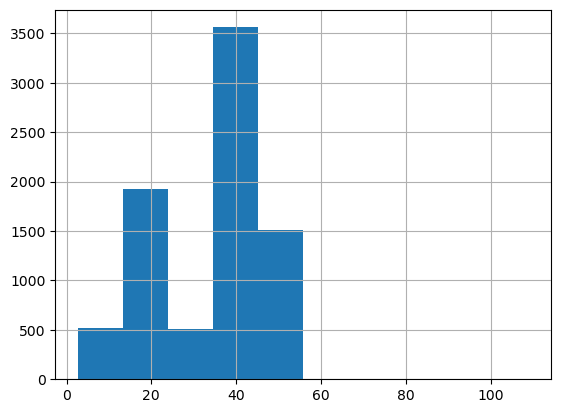

In [34]:
hourly["Hourly Rate"].hist()

In [28]:
"""
La m1 con la que queremos comparar es 30. 
La hipótesis nula es que el sueldo hourly es diferente del sueldo anual. 
La hipótesis alternativa es que son iguales.
H0: u = 30$/hr.
H1: u != 30$/hr.
alpha = 0.05
"""

mean_hourly = hourly["Hourly Rate"].mean()
mean_hourly

32.78855771628024

In [36]:
hypothesis_mean = 30

sample_mean = hourly["Hourly Rate"].mean()

alpha = 0.05

print(f'Hypothesis mean: {hypothesis_mean} USD',
      f'\nSample mean: {sample_mean} USD',
      f'\nProbability threshold: {alpha}')

Hypothesis mean: 30 USD 
Sample mean: 32.78855771628024 USD 
Probability threshold: 0.05


In [38]:
Z_score, p_value = ztest(hourly['Hourly Rate'], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np_value: {p_value}')

Z_score: 20.6198057854942 
p_value: 1.8228873859286195e-94


In [ ]:
"""El p-value es mucho más pequeño que el alfa y, por lo tanto, podemos rechazar la hipótesis nula y podemos
decir que la diferencia es significativa respecto a la media de 30."""

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [47]:
"""
H0: u <= 86000
H1: u > 86000
alpha = 0.05
"""

salaries_police = salary[salary["Department"] == "POLICE"]
mean_salary = salaries_police["Annual Salary"].mean()
mean_salary

86486.41450313339

In [48]:
hypothesis_mean = 86000

sample_mean = salaries_police["Annual Salary"].mean()

alpha = 0.05

print(f'Hypothesis mean: {hypothesis_mean} USD',
      f'\nSample mean: {sample_mean} USD',
      f'\nProbability threshold: {alpha}')

Hypothesis mean: 86000 USD 
Sample mean: 86486.41450313339 USD 
Probability threshold: 0.05


In [50]:
Z_score, p_value = ztest(salaries_police["Annual Salary"], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np_value: {p_value}')

Z_score: 3.081997005712994 
p_value: 0.002056169057509571


In [ ]:
"""El p value es más pequeño que alpha, por lo que podemos rechazar la hipótesis nula 
y decir que el sueldo es, efectivamente, mayor que 86000$"""

Using the `crosstab` function, find the department that has the most hourly workers. 

In [51]:
hourly

Name                      Job Titles  \
4           ABASCAL,  REECE E     TRAFFIC CONTROL AIDE-HOURLY   
6       ABBATACOLA,  ROBERT J             ELECTRICAL MECHANIC   
7          ABBATE,  JOSEPH L          POOL MOTOR TRUCK DRIVER   
10           ABBOTT,  BETTY L              FOSTER GRANDPARENT   
18       ABDULLAH,  LAKENYA N                  CROSSING GUARD   
...                       ...                             ...   
33164        ZUREK,  FRANCIS              ELECTRICAL MECHANIC   
33168  ZWARYCZ MANN,  IRENE A                  CROSSING GUARD   
33169      ZWARYCZ,  THOMAS J         POOL MOTOR TRUCK DRIVER   
33174        ZYGADLO,  JOHN P          MACHINIST (AUTOMOTIVE)   
33175     ZYGADLO,  MICHAEL J  FRM OF MACHINISTS - AUTOMOTIVE   

             Department Full or Part-Time Salary or Hourly  Typical Hours  \
4                  OEMC                 P           Hourly           20.0   
6              AVIATION                 F           Hourly           40.0   
7         STREETS & SAN                 F           Hourly           40.0   
10     FAMILY & SUPPORT                 P           Hourly           20.0   
18                 OEMC                 P           Hourly           20.0   
...                 ...               ...              ...            ...   
33164              OEMC                 F           Hourly           40.0   
33168              OEMC                 P           Hourly           20.0   
33169       WATER MGMNT                 F           Hourly           40.0   
33174  GENERAL SERVICES                 F           Hourly           40.0   
33175  GENERAL SERVICES                 F           Hourly           40.0   

       Annual Salary  Hourly Rate  
4                NaN        19.86  
6                NaN        46.10  
7                NaN        35.60  
10               NaN         2.65  
18               NaN        17.68  
...              ...          ...  
33164            NaN        46.10  
33168            NaN        17.68  
33169            NaN        35.60  
33174            NaN        46.35  
33175            NaN        48.85  

[8022 rows x 8 columns]

In [58]:
hourly_department = pd.crosstab(index=hourly["Department"], columns="count")
hourly_department
hourly_department.sort_values(by="count", ascending=False)

col_0                  count
Department                  
STREETS & SAN           1862
WATER MGMNT             1513
OEMC                    1273
AVIATION                1082
GENERAL SERVICES         765
TRANSPORTN               725
PUBLIC LIBRARY           299
FAMILY & SUPPORT         287
CITY COUNCIL              64
FINANCE                   44
LAW                       40
ANIMAL CONTRL             19
POLICE                    10
MAYOR'S OFFICE             8
CULTURAL AFFAIRS           7
BUSINESS AFFAIRS           7
HUMAN RESOURCES            4
COMMUNITY DEVELOPMENT      4
HEALTH                     3
FIRE                       2
PROCUREMENT                2
BUDGET & MGMT              2

The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [59]:
salaries_streets_san = hourly[hourly["Department"] == "STREETS & SAN"]
salaries_streets_san

Name               Job Titles     Department  \
7          ABBATE,  JOSEPH L   POOL MOTOR TRUCK DRIVER  STREETS & SAN   
21      ABDUL-SHAKUR,  TAHIR     GENERAL LABORER - DSS  STREETS & SAN   
24     ABERCROMBIE,  TIMOTHY        MOTOR TRUCK DRIVER  STREETS & SAN   
36        ABRAMS,  DANIELLE T       SANITATION LABORER  STREETS & SAN   
39          ABRAMS,  SAMUEL A  POOL MOTOR TRUCK DRIVER  STREETS & SAN   
...                       ...                      ...            ...   
33106        ZIZUMBO,  JOSE N       MOTOR TRUCK DRIVER  STREETS & SAN   
33107         ZIZUMBO,  LUIS        MOTOR TRUCK DRIVER  STREETS & SAN   
33147        ZUMMO,  ROBERT J       MOTOR TRUCK DRIVER  STREETS & SAN   
33149     ZUNICH,  JONATHAN G       SANITATION LABORER  STREETS & SAN   
33156        ZUNIGA,  THOMAS     GENERAL LABORER - DSS  STREETS & SAN   

      Full or Part-Time Salary or Hourly  Typical Hours  Annual Salary  \
7                     F           Hourly           40.0            NaN   
21                    F           Hourly           40.0            NaN   
24                    F           Hourly           40.0            NaN   
36                    F           Hourly           40.0            NaN   
39                    F           Hourly           40.0            NaN   
...                 ...              ...            ...            ...   
33106                 F           Hourly           40.0            NaN   
33107                 F           Hourly           40.0            NaN   
33147                 F           Hourly           40.0            NaN   
33149                 F           Hourly           40.0            NaN   
33156                 F           Hourly           40.0            NaN   

       Hourly Rate  
7            35.60  
21           21.43  
24           35.60  
36           36.21  
39           35.60  
...            ...  
33106        36.13  
33107        35.60  
33147        35.60  
33149        36.21  
33156        22.12  

[1862 rows x 8 columns]

In [60]:
"""
H0: u >= 35$/hr.
H1: u < 35$/hr.
alpha = 0.05
"""

mean_hourly = salaries_streets_san["Hourly Rate"].mean()
mean_hourly

33.72837808807734

In [61]:
hypothesis_mean = 35

sample_mean = salaries_streets_san["Hourly Rate"].mean()

alpha = 0.05

print(f'Hypothesis mean: {hypothesis_mean} USD',
      f'\nSample mean: {sample_mean} USD',
      f'\nProbability threshold: {alpha}')

Hypothesis mean: 35 USD 
Sample mean: 33.72837808807734 USD 
Probability threshold: 0.05


In [62]:
Z_score, p_value = ztest(salaries_streets_san["Hourly Rate"], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np_value: {p_value}')

Z_score: -9.567447887848152 
p_value: 1.0957711283886869e-21


In [ ]:
"""El p value es menor que el alpha, por lo que podemos rechazar la hipótesis nula con una confianza del 95%
y afirmar que los sueldos por horas del departamento están por debajo de los 35$/hora."""

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [65]:
mean_hourly_wage = hourly["Hourly Rate"].mean()
mean_hourly_wage

32.78855771628024

In [87]:
alpha = 0.95
degrees_of_freedom = len(hourly["Hourly Rate"]) - 1
mean = mean_hourly_wage
standard_error = np.std(hourly["Hourly Rate"], ddof=1) / np.sqrt(len(hourly["Hourly Rate"]))

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [89]:
confidence_interval = t.interval(alpha, degrees_of_freedom, mean, standard_error)
confidence_interval

(32.52345834488425, 33.05365708767623)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [101]:
num_hourly_workers = len(hourly)
num_hourly_workers

8022

In [102]:
num_total_workers = len(salaries)
num_total_workers

33183

In [103]:
value_null = 25

In [105]:
"""
H0: u = 25
H1: u != 25
alpha = 0.05
"""

stat, p_value = proportions_ztest(num_hourly_workers, num_total_workers, value_null)

alpha = 0.05

print(f"P_value: {p_value}")

P_value: 0.0


In [ ]:
"""El p value es menor que el alpha, por lo que se puede rechazar la hipótesis nula con una confianza del 95%
y afirmar que el valor es significativamente diferente de 25%"""